In [ ]:
# !pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__, keras.__version__

('2.8.2', '2.8.0')

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
cfar = keras.datasets.cifar10
(xtrain, ytrain), (xtest, ytest) = cfar.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
xtrain.shape

(50000, 32, 32, 3)

In [ ]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
np.unique(ytrain, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4495, 4540, 4481, 4514, 4481, 4512, 4481, 4514, 4480, 4502]))

In [ ]:
class_name = {0:	'airplane',
1:	'automobile',
2	:'bird',
3:	'cat',
4	:'deer',
5:	'dog',
6	:'frog',
7	:'horse',
8	:'ship',
9:	'truck'}

In [ ]:
xtrain[0].shape

(32, 32, 3)

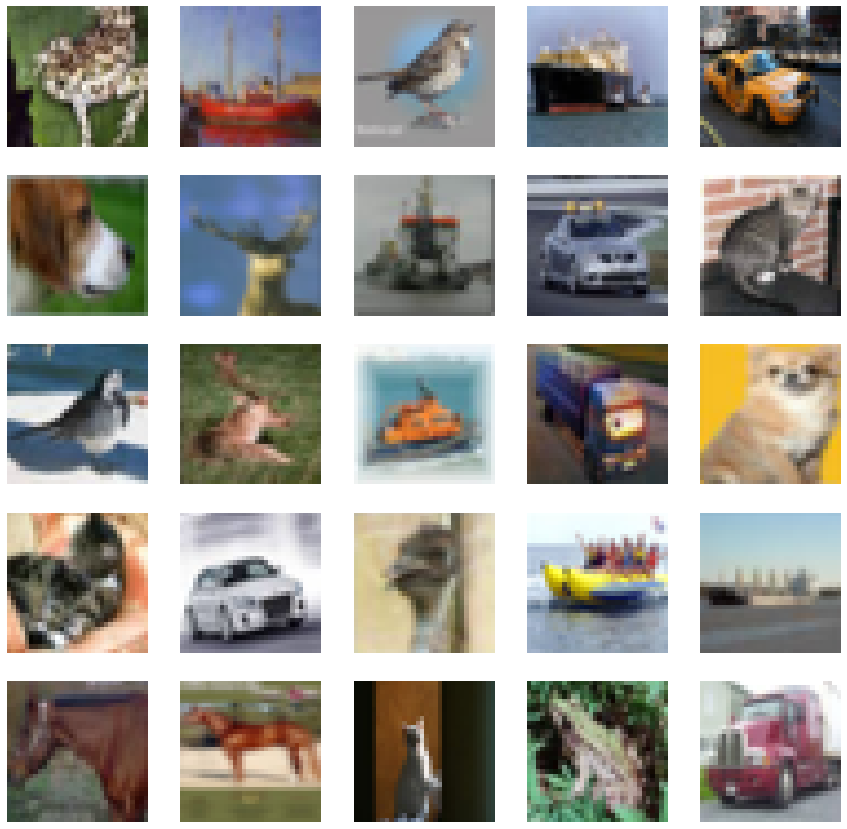

In [ ]:
fig, axes1 = plt.subplots(5,5,figsize=(15,15))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(xtrain)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(xtrain[i:i+1][0])

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 hidden1 = model.layers[1]
 weights, biases = hidden1.get_weights()
 weights.shape, biases.shape

((3072, 300), (300,))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])



In [ ]:
history = model.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8895 - accuracy: 0.3231 - val_loss: 1.9152 - val_accuracy: 0.2948
Epoch 2/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7061 - accuracy: 0.3941 - val_loss: 1.7930 - val_accuracy: 0.3596
Epoch 3/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6274 - accuracy: 0.4241 - val_loss: 1.5938 - val_accuracy: 0.4356
Epoch 4/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5684 - accuracy: 0.4442 - val_loss: 1.8531 - val_accuracy: 0.3348
Epoch 5/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5220 - accuracy: 0.4592 - val_loss: 1.5967 - val_accuracy: 0.4220
Epoch 6/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4894 - accuracy: 0.4722 - val_loss: 1.6319 - val_accuracy: 0.4220
Epoch 7/30
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4561 - accuracy: 0.4824 - val_loss: 1.5471 - val_accuracy:

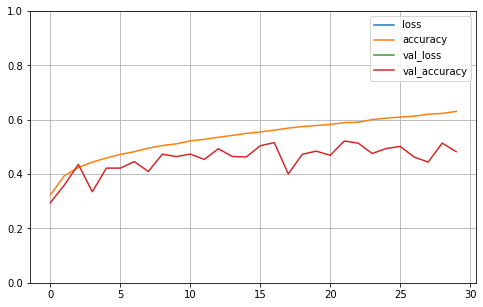

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [ ]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 403.8497 - accuracy: 0.3911


[403.8497009277344, 0.3910999894142151]

# Regression

In [ ]:
import sklearn as sk
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

htrain, htest, hytrain, hytest = train_test_split(housing.data, housing.target)
htrain, hvalid, hytrain, hyvalid = train_test_split(htrain, hytrain)

scaler = StandardScaler()
htrain = scaler.fit_transform(htrain)
hvalid = scaler.transform(hvalid)
htest = scaler.transform(htest)

In [ ]:
rmodel = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=htrain.shape[1:]),
keras.layers.Dense(1)
])
rmodel.compile(loss="mean_squared_error", optimizer="sgd")
history = rmodel.fit(htrain, hytrain, epochs=20,
validation_data=(hvalid, hyvalid))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0204 - val_loss: 0.5918
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5192 - val_loss: 0.5080
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4808 - val_loss: 0.4938
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4670 - val_loss: 0.4766
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4507 - val_loss: 0.4591
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4400 - val_loss: 0.4476
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4326 - val_loss: 0.5272
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4284 - val_loss: 0.4360
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4204 - val_loss: 0.4280
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4287 - val_loss: 0.4478

In [ ]:
mse_test = rmodel.evaluate(htest, hytest)


162/162 [==============================] - 0s 887us/step - loss: 0.4019


In [ ]:
hpred = rmodel.predict(htest)
hpred

array([[1.0312779],
       [2.2226822],
       [1.0493907],
       ...,
       [2.4258327],
       [0.5569757],
       [1.8134044]], dtype=float32)

## Functional API

In [ ]:
input_ = keras.layers.Input(shape=htrain.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
rfmodel = keras.Model(inputs=[input_], outputs=[output])
# # Another alternative DNN with multiple inputs. For Multiple outputs, tune output paramerter of models.Model accordingly
# input_A = keras.layers.Input(shape=[5], name="wide_input")
# input_B = keras.layers.Input(shape=[6], name="deep_input")
# hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
# hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# concat = keras.layers.concatenate([input_A, hidden2])
# output = keras.layers.Dense(1, name="output")(concat)
# model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])


In [ ]:
rfmodel.compile(loss="mean_squared_error", optimizer="sgd")
history = rfmodel.fit(htrain, hytrain, epochs=20, validation_data=(hvalid, hyvalid))
rfmodel.evaluate(htest,hytest)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9527 - val_loss: 0.5551
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5474 - val_loss: 0.6183
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4757 - val_loss: 0.4720
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4689 - val_loss: 0.4436
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4231 - val_loss: 0.4269
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4359 - val_loss: 0.4192
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4096 - val_loss: 0.4106
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6743 - val_loss: 0.4060
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4094 - val_loss: 0.3978
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3890 - val_loss: 0.3888

0.3695552945137024

In [ ]:
# Part wide, part deep
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
rf2model = keras.Model(inputs=[input_A, input_B], outputs=[output])
# # Alternatively this for multiple outputs
# output = keras.layers.Dense(1, name="main_output")(concat)
# aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
# model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])


rf2model.compile(loss="mean_squared_error", optimizer="sgd")
history = rf2model.fit((htrain[:, :5], htrain[:, 2:]), hytrain, epochs=20, validation_data=((hvalid[:, :5],hvalid[:, 2:]), hyvalid))
rf2model.evaluate((htest[:, :5], htest[:, 2:]),hytest)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7960 - val_loss: 0.5705
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8452 - val_loss: 0.5858
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5481 - val_loss: 0.5395
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5261 - val_loss: 0.5156
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4850 - val_loss: 0.4924
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4791 - val_loss: 0.4878
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4700 - val_loss: 0.4806
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4448 - val_loss: 0.4611
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4359 - val_loss: 0.4504
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4620 - val_loss: 0.4412

0.3776235282421112

# TensorBoard

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
# run_logdir

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[28, 28]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
xvalid, xtrain = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
yvalid, ytrain = y_train_full[:5000], y_train_full[5000:]
xtest = X_test / 255.

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xvalid, yvalid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 9.3679 - val_loss: 8.2779
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3785 - val_loss: 8.2703
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3743 - val_loss: 8.2580
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3696 - val_loss: 8.2665
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3705 - val_loss: 8.2596
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3689 - val_loss: 8.2540
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3668 - val_loss: 8.2569
Epoch 8/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3649 - val_loss: 8.2538
Epoch 9/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3650 - val_loss: 8.2543
Epoch 10/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.363

In [ ]:
# # For running in Terminal, use the following
# $ tensorboard --logdir=./my_logs --port=6006 

# For collab, use the following
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

<IPython.core.display.Javascript object>

In [ ]:
from tensorboard import notebook
notebook.list() 
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000) 

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:00:00 ago; pid 871)
Selecting TensorBoard with logdir ./my_logs (started 0:00:00 ago; port 6006, pid 871).


<IPython.core.display.Javascript object>